In [1]:
import matplotlib.pyplot as plt
import numpy as np
def plot_curves():
    train_losses = []
    logfile = open("2fac_train_losses.txt","r")
    for line in logfile:
        train_losses.append(float(line))
    val_losses = []
    logfile = open("2fac_val_losses.txt","r")
    for line in logfile:
        val_losses.append(float(line))
    t = np.linspace(0, len(val_losses[:]), len(val_losses[:]))
    plt.plot(t, np.array(train_losses[:]), 'r')
    plt.plot(t, np.array(val_losses[:]), 'b')
    plt.show()

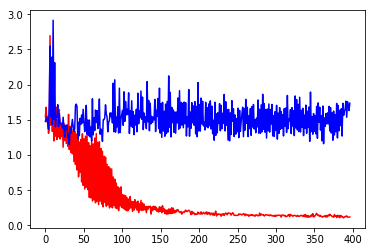

In [2]:
plot_curves()

In [3]:
import pickle as pkl
from IPython.display import Audio

def merge_images(sources, targets, k=10):
    _, h, w = sources.shape
    print(sources.shape[0], h, w)
    row = int(np.sqrt(sources.shape[0]))  # Square root of batch size
    merged = np.zeros([row*h, row*w*2])
    for idx, (s, t) in enumerate(zip(sources, targets)):
        i = idx // row
        j = idx % row
        merged[i*h:(i+1)*h, (j*2)*h:(j*2+1)*h] = s
        merged[i*h:(i+1)*h, (j*2+1)*h:(j*2+2)*h] = t
    return merged

def plot_cqts():
    with open("2fac_gt_data.pkl", 'rb') as fh:
        gt_data = pkl.loads(fh.read())
    fh.close()
    gt_cqts = gt_data['gt_cqts']
    gt_samples = gt_data['gt_samples']
    gt_stringNumbers = gt_data['gt_stringNumbers']
    gt_tabs = gt_data['gt_tabs']
    
    with open("2fac_pred_data.pkl", 'rb') as fh:
        pred_data = pkl.loads(fh.read())
    fh.close()
    pred_cqts = pred_data['pred_cqts']
    pred_samples = pred_data['pred_samples']
    pred_stringNumbers = pred_data['pred_stringNumbers']
    pred_tabs = pred_data['pred_tabs']
    
    plt.figure(figsize=(16,12))
    plt.imshow(merge_images(gt_cqts[:16], pred_cqts[:16]))
    return gt_samples, gt_stringNumbers, gt_tabs, pred_samples, pred_stringNumbers, pred_tabs

In [ ]:
freqs = []
num_frets = 24
num_octaves = 2 + num_frets // 12
print(num_octaves)
num_semitones = num_octaves * 12 + num_frets % 12 + 1
print(num_semitones)
for i in range(4, num_semitones + 4):
    freqs.append(compute_freq(2, i))
print(freqs)
freq = np.random.choice(np.array(s))
fs = 16000
string = karplus_strong(freq, 2 * fs, 1, 1)
sample = string.get_samples()
print(sample.shape)
display(Audio(sample, rate=fs))
print(cqt_spec(sample).shape)
plt.imshow(cqt_spec(sample))

4 336 336
[5 5 5 0]
[4.0566726 4.3683615 4.3926554 1.0572956]
[ 8 11  6  8]
[9.293054  9.75163   8.635296  5.9182873]


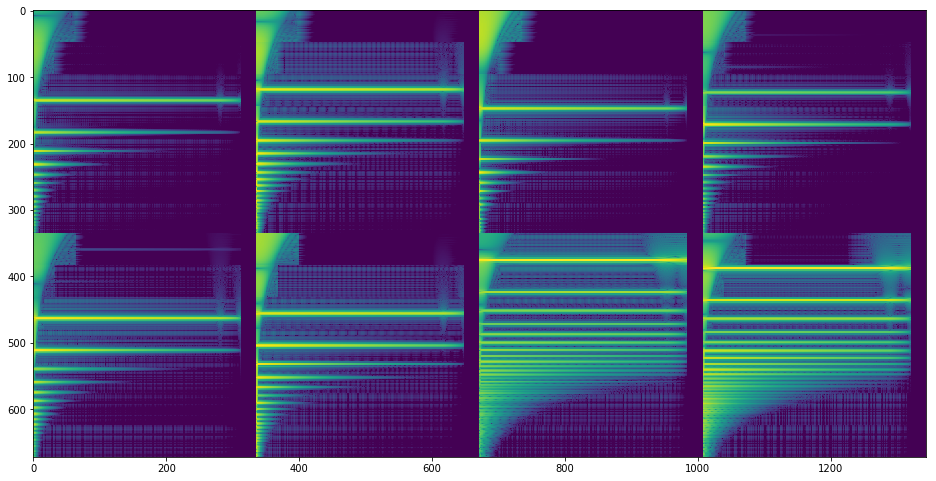

In [9]:
gt_samples, gt_stringNumbers, gt_tabs, pred_samples, pred_stringNumbers, pred_tabs = plot_cqts()
print(gt_stringNumbers)
print(pred_stringNumbers)
print(gt_tabs)
print(pred_tabs)

In [6]:
for i in range(len(gt_samples)):
    print("GT")
    display(Audio(gt_samples[i], rate=36000))
    print("Pred")
    display(Audio(pred_samples[i], rate=36000))

GT


Pred


GT


Pred


GT


Pred


GT


Pred
